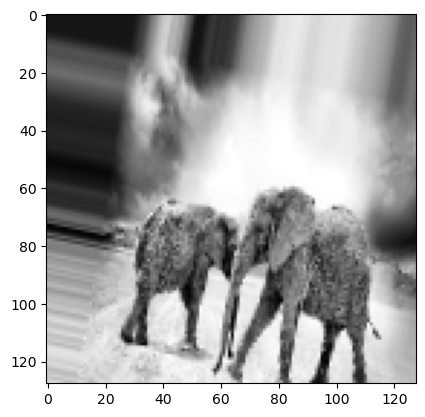

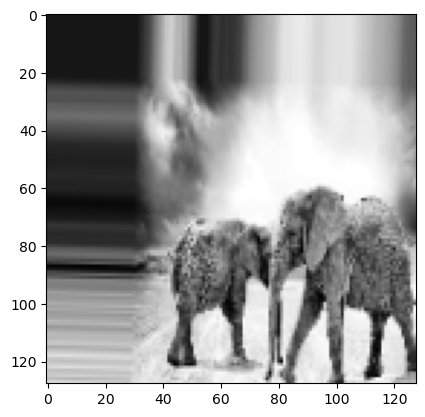

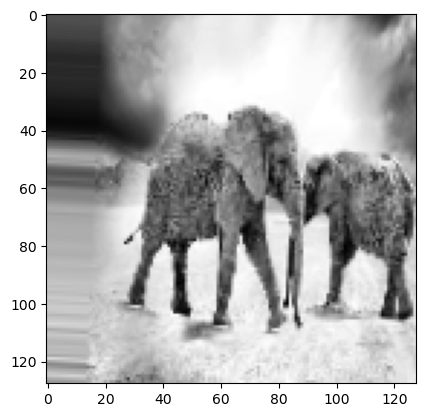

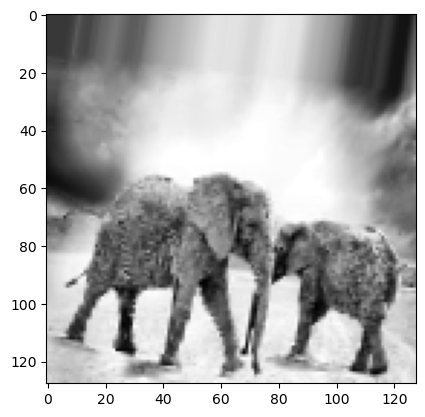

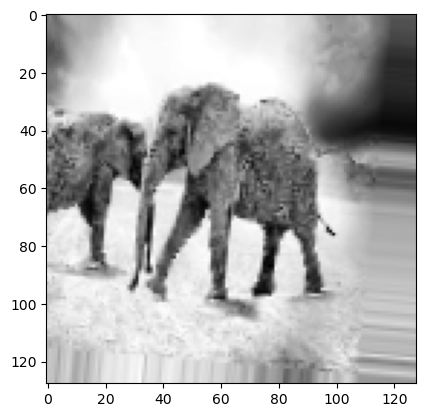

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt



# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels



# DATA PATHS
cow_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cow"
dog_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\dog"
elefante_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\elefante"
farfalla_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\farfalla"
goat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\goat"
hen_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\hen"
horse_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\horse"
cat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cat"
scoiattolo_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\scoiattolo"



# LOAD AND PREPROCESS IMAGE DATA
cow_images, cow_labels = load_and_preprocess_images(cow_image_dir, label="cow")
dog_images, dog_labels = load_and_preprocess_images(dog_image_dir, label="dog")
elefante_images, elefante_labels = load_and_preprocess_images(elefante_image_dir, label="elefante")
farfalla_images, farfalla_labels = load_and_preprocess_images(farfalla_image_dir, label="farfalla")
goat_images, goat_labels = load_and_preprocess_images(goat_image_dir, label="goat")
hen_images, hen_labels = load_and_preprocess_images(hen_image_dir, label="hen")
horse_images, horse_labels = load_and_preprocess_images(horse_image_dir, label="horse")
cat_images, cat_labels = load_and_preprocess_images(cat_image_dir, label="cat")
scoiattolo_images, scoiattolo_labels = load_and_preprocess_images(scoiattolo_image_dir, label="scoiattolo")




#ENSURE ALL IMAGES HAVE THE SAME NUMBER OF DIMENSIONS (3 for RGB, 2 for grayscale)
def reshape_images(images):
    return [img if len(img.shape) == 3 else np.expand_dims(img, axis=-1) for img in images]

cow_images = reshape_images(cow_images)
dog_images = reshape_images(dog_images)
elefante_images = reshape_images(elefante_images)
farfalla_images = reshape_images(farfalla_images)
goat_images = reshape_images(goat_images)
hen_images = reshape_images(hen_images)
horse_images = reshape_images(horse_images)
cat_images = reshape_images(cat_images)
scoiattolo_images = reshape_images(scoiattolo_images)


#STORE IMAGES AND LABEL IN LISTS 
all_images = cow_images + dog_images + elefante_images + farfalla_images + goat_images + hen_images + horse_images + cat_images + scoiattolo_images
all_labels = cow_labels + dog_labels + elefante_labels + farfalla_labels + goat_labels + hen_labels + horse_labels + cat_labels + scoiattolo_labels

#CONVERT LISTS TO NUMPY ARRAY 
images = np.array(all_images)
labels = np.array(all_labels)

# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# CONVERT LABELS TO ONE HOT ENCODING
one_hot_labels = to_categorical(numeric_labels)

# NORMALIZE AND PIXEL VALUES
images = images / 255.0

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# SHOW OF DATA AUGMENTATION IMAGE 
animal_img = images[0].reshape((1,) + images[0].shape)
for _ in range(5):
    aug_img = datagen.flow(animal_img).next()[0].reshape(images[0].shape)
    plt.imshow(aug_img[:, :, 0], cmap='gray')  # DISPLAY THE AUGMENTED IMAGE 
    plt.show()


X_train shape: (1277, 128, 128, 1)
y_train shape: (1277, 4)
X_test shape: (320, 128, 128, 1)
y_test shape: (320, 4)


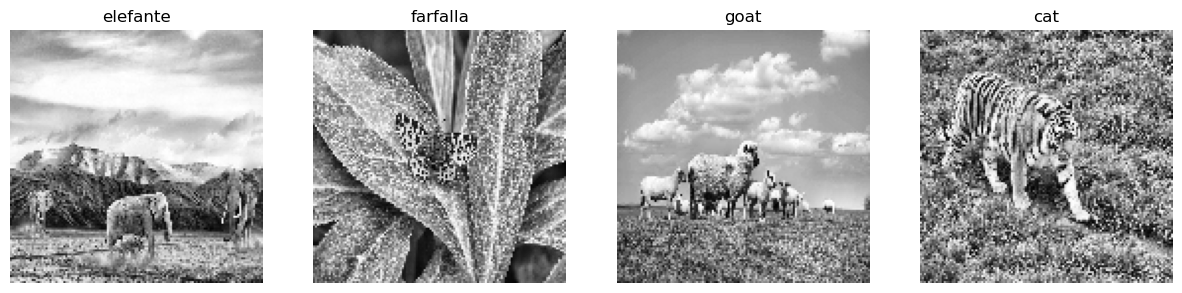

In [3]:
#CHECK SHAPE 

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import random



# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            ## Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATA PATHS
cow_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cow"
dog_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\dog"
elefante_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\elefante"
farfalla_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\farfalla"
goat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\goat"
hen_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\hen"
horse_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\horse"
cat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cat"
scoiattolo_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\scoiattolo"



# LOAD AND PREPROCESS IMAGE DATA
cow_images, cow_labels = load_and_preprocess_images(cow_image_dir, label="cow")
dog_images, dog_labels = load_and_preprocess_images(dog_image_dir, label="dog")
elefante_images, elefante_labels = load_and_preprocess_images(elefante_image_dir, label="elefante")
farfalla_images, farfalla_labels = load_and_preprocess_images(farfalla_image_dir, label="farfalla")
goat_images, goat_labels = load_and_preprocess_images(goat_image_dir, label="goat")
hen_images, hen_labels = load_and_preprocess_images(hen_image_dir, label="hen")
horse_images, horse_labels = load_and_preprocess_images(horse_image_dir, label="horse")
cat_images, cat_labels = load_and_preprocess_images(cat_image_dir, label="cat")
scoiattolo_images, scoiattolo_labels = load_and_preprocess_images(scoiattolo_image_dir, label="scoiattolo")



#ENSURE ALL IMAGES HAVE THE SAME NUMBER OF DIMENSIONS (3 for RGB, 2 for grayscale)
def reshape_images(images):
    return [img if len(img.shape) == 3 else np.expand_dims(img, axis=-1) for img in images]

cow_images = reshape_images(cow_images)
dog_images = reshape_images(dog_images)
elefante_images = reshape_images(elefante_images)
farfalla_images = reshape_images(farfalla_images)
goat_images = reshape_images(goat_images)
hen_images = reshape_images(hen_images)
horse_images = reshape_images(horse_images)
cat_images = reshape_images(cat_images)
scoiattolo_images = reshape_images(scoiattolo_images)

#STORE IMAGES AND LABEL LISTS 
all_images = cow_images + dog_images + elefante_images + farfalla_images + goat_images + hen_images + horse_images + cat_images + scoiattolo_images
all_labels = cow_labels + dog_labels + elefante_labels + farfalla_labels + goat_labels + hen_labels + horse_labels + cat_labels + scoiattolo_labels

#CONVERT LIST TO NUMPY ARRAYS
images = np.array(all_images)
labels = np.array(all_labels)

# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# CONVERT LABELS TO ONE HOT ENCODING
one_hot_labels = to_categorical(numeric_labels)

# NORMALIZE AND PIXEL VALUES
images = images / 255.0

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# SPLIT THE DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)








# PRINT 4 IMAGE FROM DIFFERENT DIRECTORY
num_images_to_display = 4

#SELECT ONE IMAGE RANDOMLY FROM EACH CATEGORY  
selected_images = []
selected_labels = []

for category_dir in [cow_image_dir, dog_image_dir, elefante_image_dir, farfalla_image_dir,
                     goat_image_dir, hen_image_dir, horse_image_dir, cat_image_dir, scoiattolo_image_dir]:
    images_in_category = [img for img, label in zip(all_images, all_labels) if label == os.path.basename(category_dir)]
    
    if images_in_category:
        random_image = random.choice(images_in_category)
        selected_images.append(random_image)
        selected_labels.append(label_encoder.transform([os.path.basename(category_dir)])[0])

# CHECK IF ENOUGH IMAGES WERE FOUND 
num_images_to_display = min(num_images_to_display, len(selected_images))

#PLOT THE SELECTED IMAGES
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(label_encoder.classes_[selected_labels[i]])
    plt.axis('off')

plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

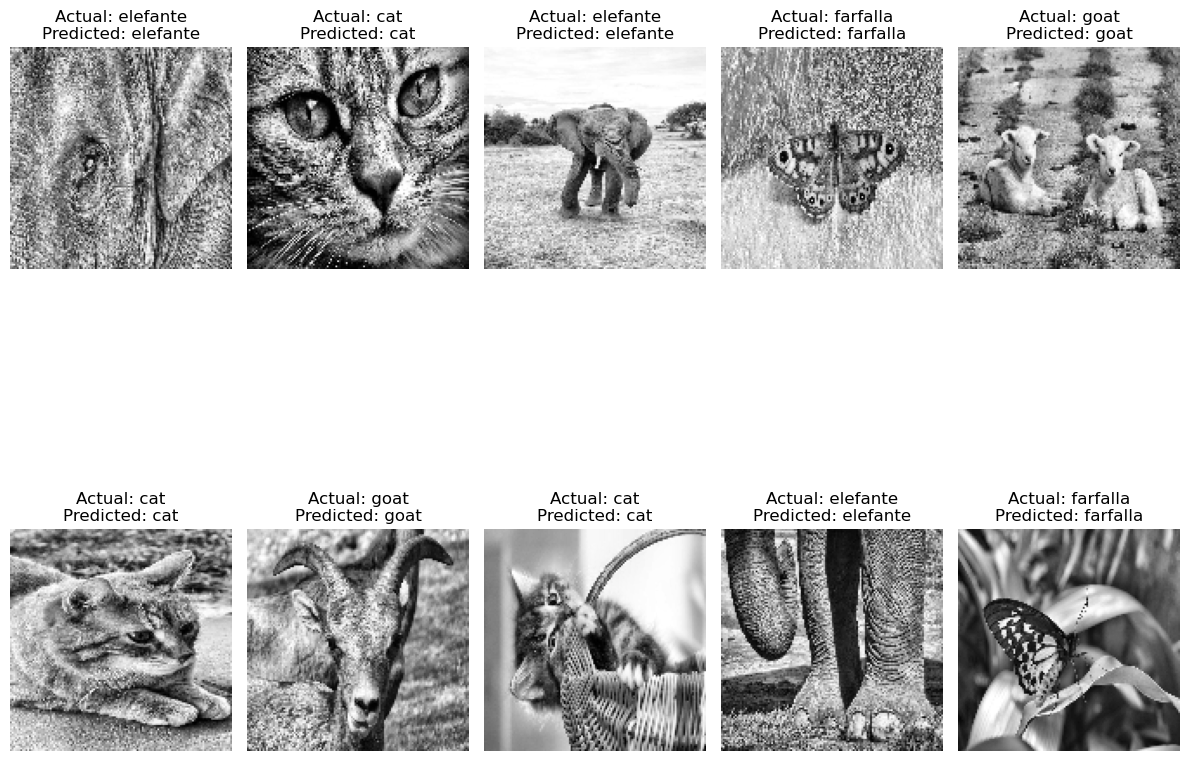

In [4]:
#PERFORM CNN MODEL 

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, models


# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

           # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATA PATHS
cow_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cow"
dog_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\dog"
elefante_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\elefante"
farfalla_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\farfalla"
goat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\goat"
hen_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\hen"
horse_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\horse"
cat_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\cat"
scoiattolo_image_dir = r"C:\Users\nh013\Desktop\animal classi\raw-img\scoiattolo"



# LOAD AND PREPROCESS IMAGE DATA
cow_images, cow_labels = load_and_preprocess_images(cow_image_dir, label="cow")
dog_images, dog_labels = load_and_preprocess_images(dog_image_dir, label="dog")
elefante_images, elefante_labels = load_and_preprocess_images(elefante_image_dir, label="elefante")
farfalla_images, farfalla_labels = load_and_preprocess_images(farfalla_image_dir, label="farfalla")
goat_images, goat_labels = load_and_preprocess_images(goat_image_dir, label="goat")
hen_images, hen_labels = load_and_preprocess_images(hen_image_dir, label="hen")
horse_images, horse_labels = load_and_preprocess_images(horse_image_dir, label="horse")
cat_images, cat_labels = load_and_preprocess_images(cat_image_dir, label="cat")
scoiattolo_images, scoiattolo_labels = load_and_preprocess_images(scoiattolo_image_dir, label="scoiattolo")



#ENSURE ALL IMAGES HAVE THE SAME NUMBER OF DIMENSIONS (3 for RGB, 2 for grayscale)
def reshape_images(images):
    return [img if len(img.shape) == 3 else np.expand_dims(img, axis=-1) for img in images]

cow_images = reshape_images(cow_images)
dog_images = reshape_images(dog_images)
elefante_images = reshape_images(elefante_images)
farfalla_images = reshape_images(farfalla_images)
goat_images = reshape_images(goat_images)
hen_images = reshape_images(hen_images)
horse_images = reshape_images(horse_images)
cat_images = reshape_images(cat_images)
scoiattolo_images = reshape_images(scoiattolo_images)

#STORE IMAGES AND LABEL LISTS 
all_images = cow_images + dog_images + elefante_images + farfalla_images + goat_images + hen_images + horse_images + cat_images + scoiattolo_images
all_labels = cow_labels + dog_labels + elefante_labels + farfalla_labels + goat_labels + hen_labels + horse_labels + cat_labels + scoiattolo_labels

#CONVERT LIST TO NUMPY ARRAYS
images = np.array(all_images)
labels = np.array(all_labels)

# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# CONVERT LABELS TO ONE HOT ENCODING
one_hot_labels = to_categorical(numeric_labels)

# NORMALIZE AND PIXEL VALUES
images = images / 255.0

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# SPLIT THE DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)





# CNN MODEL 
model = models.Sequential()

# CONVOLUTIONAL LAYERS
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# FULLY CONNECTED LAYERS
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  


#ASSUMING NUMERIC_LABELS ARE THE CLASS LABELS 
one_hot_labels = to_categorical(numeric_labels, num_classes=4)  


# COMPILE THE MODEL 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#DISPLAY MODEL SUMMERY
model.summary()

# TRAIN MODEL 
batch_size = 32
epochs = 300

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

#EVALUATE THE MODEL ON TEST SET 
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

#TRAIN THE MODEL AND STORE PREDICTION 
predictions = model.predict(X_test)

#PLOT SOME RANDOM IMAGES WITH THEIR ACTUAL AND PREDICTED LABELS 
indices = np.random.choice(range(len(X_test)), size=10, replace=False)

for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)

    # GET THE ACTUAL CLASS INDEX
    actual_class_index = np.argmax(y_test[index])

    #CONVERT THE ACTUAL CLASS INDEX BACK TO THE ORGINAL LABEL
    actual_class = label_encoder.classes_[actual_class_index]

    #GET THE PREDICTED CLASS INDEX 
    predicted_class_index = np.argmax(predictions[index])

    #CONVERT THE PREDICTED CLASS INDEX BACK TO THE ORGINAL LABEL 
    predicted_class = label_encoder.classes_[predicted_class_index]

    #IMAGE PLOT
    plt.imshow(X_test[index].reshape(128, 128), cmap='gray')
    plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()

